SELECTIVE SAPCE PCE

In [4]:
import itertools
import math
import numpy as np
import UQpy
from scipy.special import comb
from UQpy.distributions import Uniform,Normal, JointIndependent
from UQpy.surrogates.polynomial_chaos import TotalDegreeBasis, LeastSquareRegression
from UQpy.sensitivity import PceSensitivity
from UQpy.sampling import MonteCarloSampling
from sklearn.metrics import mean_squared_error, r2_score
import time  
import scipy as sp
import random
import matplotlib.pyplot as plt

import SAPCE

In [5]:
def root_mean_squared_error(y_true, y_pred, multioutput='uniform_average'):
    mse = mean_squared_error(y_true, y_pred, multioutput=multioutput)
    if isinstance(mse, np.ndarray):
        return np.sqrt(mse)
    return np.sqrt(mse)


In [6]:
import pandas as pd
data = pd.read_csv('Oakwood.csv', sep=';', header=0)
data_NVM= pd.read_csv('Oakwood_NVM.csv', sep=';', header=0)

names=data.columns.tolist()
data_array=data.to_numpy()

names_NVM=data_NVM.columns.tolist()
data_array_NVM=data_NVM.to_numpy()

In [7]:
X=data_array[:,:12]
Y_all=data_array[:,12:]
Y_tunnel=data_array[:,12:23]
Y_surface=data_array[:,23:]

Y_all_NVM=data_array_NVM[:,12:]

Y_N=Y_all_NVM[:,:113]
Y_V=Y_all_NVM[:,113:226]
Y_M=Y_all_NVM[:,226:]

In [8]:
Y_all.shape

(1000, 23)

In [9]:
# Concrete parameters
dist_Ec=Normal(13,1)
dist_Relax=Uniform(30,40)

# Soil1
dist_S1_Erel=Uniform(2,1)
dist_S1_E50=Normal(65,5)
dist_S1_c=Normal(30,5)
dist_S1_theta=Normal(30,1)
dist_S1_ko=Uniform(0.6,0.5)

# Soil2
dist_S1_Erel=Uniform(2,1)
dist_S1_E50=Normal(130,10)
dist_S1_c=Normal(5,1)
dist_S1_theta=Normal(42,1)
dist_S1_ko=Uniform(0.45,0.2)


marg = [dist_Ec,dist_Relax, dist_S1_Erel, dist_S1_E50, dist_S1_c,dist_S1_theta,dist_S1_ko,dist_S1_Erel,dist_S1_E50,dist_S1_c,dist_S1_theta,dist_S1_ko]
joint = JointIndependent(marginals=marg)

Enter 1 to show added design points during adaptation, otherwise press Enter:  



 Initial design size: 15 
Theta run 0
Theta run 1
Theta run 2
Theta run 3
Theta run 4
Theta run 5
Theta run 6
Theta run 7
Theta run 8
Theta run 9
Random run 0
Random run 1
Random run 2
Random run 3
Random run 4
First 10 predictions (global PCE):
   y_true    y_pred
 0.000000  0.000002
 0.002500  0.002437
-0.003142 -0.003166
-0.008819 -0.008825
-0.003731 -0.003730
-0.005976 -0.005963
-0.002951 -0.002941
-0.008702 -0.008681
-0.006160 -0.006123
-0.000475 -0.000449

First 10 predictions (random design PCE):
   y_true  y_pred_random
 0.000000       0.000000
 0.002500       0.002293
-0.003142      -0.003163
-0.008819      -0.008823
-0.003731      -0.003731
-0.005976      -0.005966
-0.002951      -0.002945
-0.008702      -0.008680
-0.006160      -0.006124
-0.000475      -0.000452


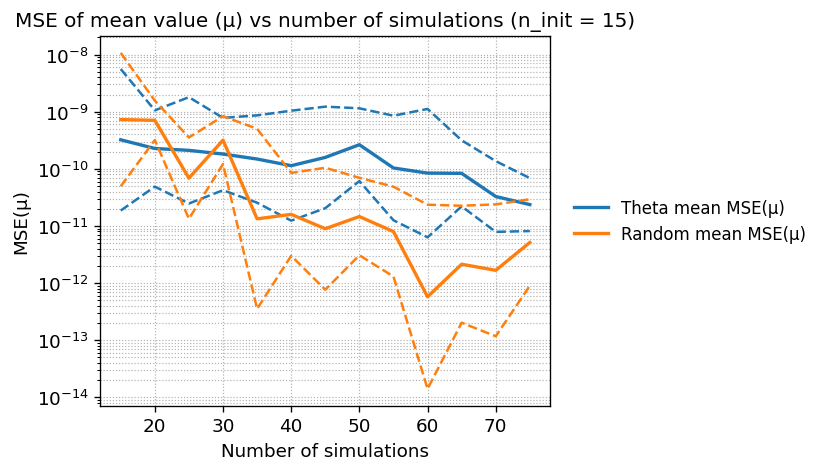

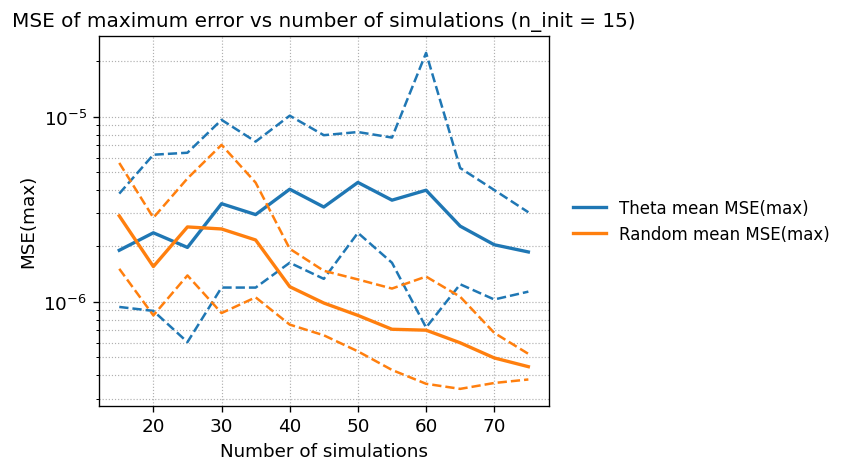


 Initial design size: 30 
Theta run 0
Theta run 1
Theta run 2
Theta run 3
Theta run 4
Theta run 5
Theta run 6
Theta run 7
Theta run 8
Theta run 9
Random run 0
Random run 1
Random run 2
Random run 3
Random run 4
First 10 predictions (global PCE):
   y_true    y_pred
 0.000000  0.000002
 0.002500  0.002437
-0.003142 -0.003166
-0.008819 -0.008825
-0.003731 -0.003730
-0.005976 -0.005963
-0.002951 -0.002941
-0.008702 -0.008681
-0.006160 -0.006123
-0.000475 -0.000449

First 10 predictions (random design PCE):
   y_true  y_pred_random
 0.000000       0.000000
 0.002500       0.002441
-0.003142      -0.003170
-0.008819      -0.008825
-0.003731      -0.003720
-0.005976      -0.005956
-0.002951      -0.002932
-0.008702      -0.008665
-0.006160      -0.006101
-0.000475      -0.000428


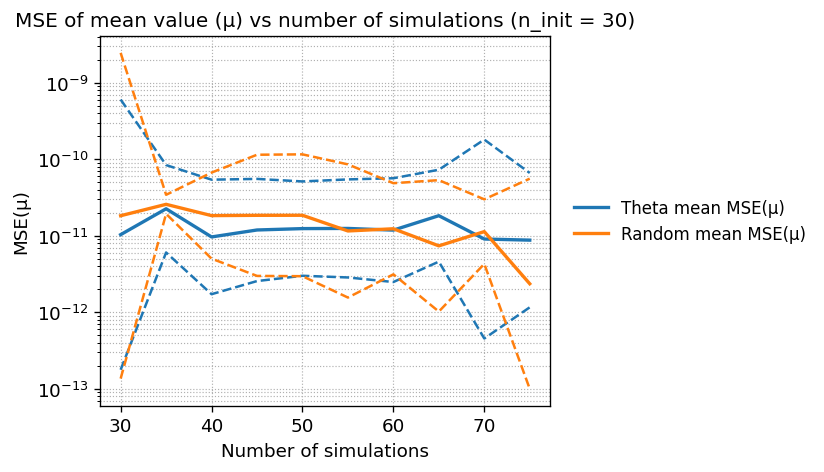

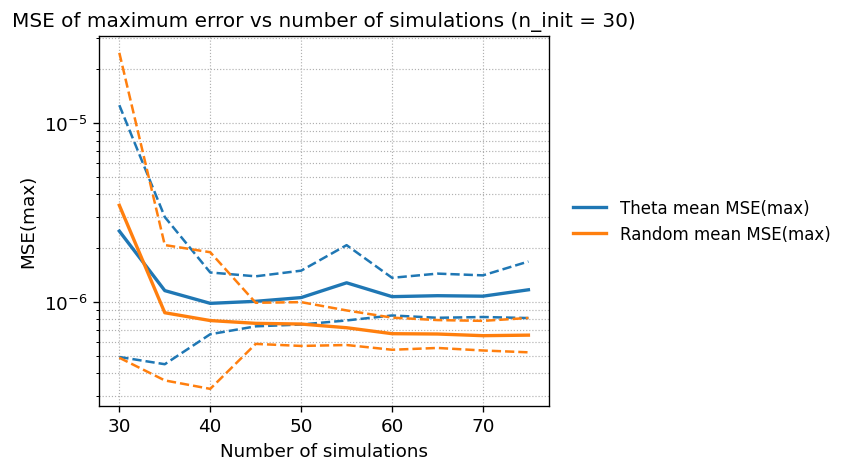


 Initial design size: 45 
Theta run 0
Theta run 1
Theta run 2
Theta run 3
Theta run 4
Theta run 5
Theta run 6
Theta run 7
Theta run 8
Theta run 9
Random run 0
Random run 1
Random run 2
Random run 3
Random run 4
First 10 predictions (global PCE):
   y_true    y_pred
 0.000000  0.000002
 0.002500  0.002437
-0.003142 -0.003166
-0.008819 -0.008825
-0.003731 -0.003730
-0.005976 -0.005963
-0.002951 -0.002941
-0.008702 -0.008681
-0.006160 -0.006123
-0.000475 -0.000449

First 10 predictions (random design PCE):
   y_true  y_pred_random
 0.000000       0.000000
 0.002500       0.002449
-0.003142      -0.003138
-0.008819      -0.008797
-0.003731      -0.003697
-0.005976      -0.005943
-0.002951      -0.002917
-0.008702      -0.008666
-0.006160      -0.006122
-0.000475      -0.000447


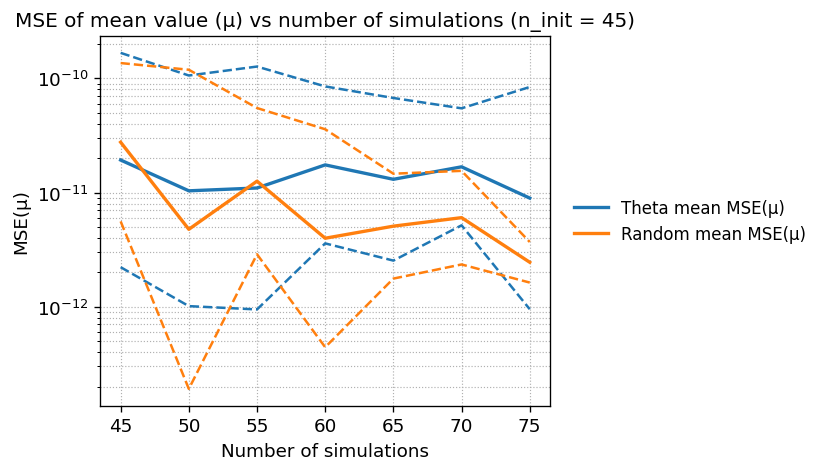

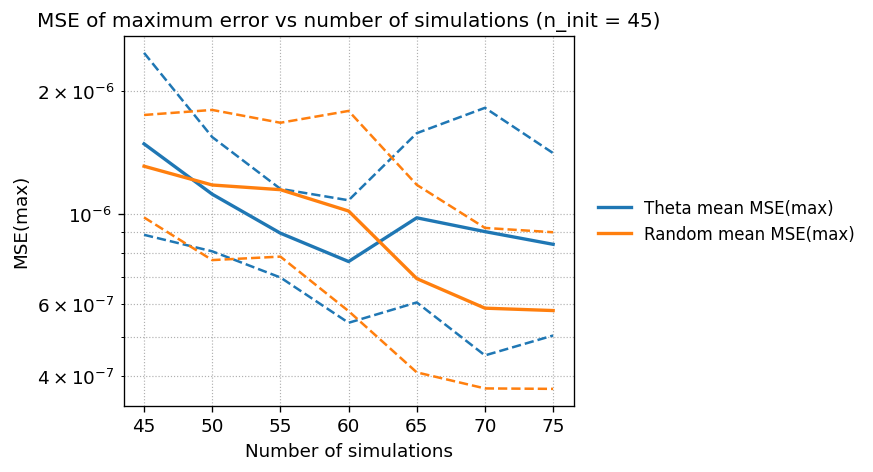

In [38]:
import numpy as np  # knihovna numpy
import matplotlib.pyplot as plt  # grafy plt
import random  # nahodne volby
from UQpy.sampling import ThetaCriterionPCE  # theta kriterium
import pandas as pd
import contextlib
import io

# at jsou hezci grafy
# basic style for publication-like figures
plt.rcParams.update({
    "font.size": 11,
    "axes.labelsize": 11,
    "axes.titlesize": 12,
    "legend.fontsize": 10,
    "figure.dpi": 120,
})

# jednoduchy vstup z konzole
show_design_plots = input("Enter 1 to show added design points during adaptation, otherwise press Enter: ").strip() == "1"  # volba vykresleni

max_partial_degree_value = 10  # maximalni stupen polynomu pro vsechny PCE

all_indices = np.arange(len(Y_all))  # vsechny indexy

# tri testovane startovni varianty
initial_sizes = [15, 30, 45]

for init_size in initial_sizes:
    print(f"\n Initial design size: {init_size} ")

    # statistiky chyb pro thetu a random
    theta_mse_mu_runs = []   # MSE chyby stredni hodnoty (μ) pro thetu
    theta_mse_max_runs = []  # MSE maximalni chyby pro thetu

    random_mse_mu_runs = []   # MSE chyby stredni hodnoty (μ) pro random
    random_mse_max_runs = []  # MSE maximalni chyby pro random

    nsim_theta_values = None
    nsim_random_values = None

    base_n = init_size  # pocatecni body
    max_n = 75  # maximalni body
    increment = 5  # krok pridani
    n_steps = (max_n - base_n) // increment + 1  # pocet kroku
    initial_indices_runs = [random.sample(list(all_indices), base_n) for _ in range(10)]  # start behu

    sapce_random_final = None  # finalni random PCE pro vypis odhadu
    # tady se ulozi posledni
        
                        # THETA KRITERIUM #
    for s in range(10):  # smycka behu
        print(f"Theta run {s}")
        mse_mu_errs = []   # MSE chyby stredni hodnoty behu
        mse_max_errs = []  # MSE maximalni chyby behu
        nsim = []          # pocty simulaci

        initial_indices = initial_indices_runs[s]  # pocatecni body
        remaining_indices = [idx for idx in all_indices if idx not in initial_indices]
        # kandidati co jeste nejsou pouziti

        Xadapted = X[initial_indices, :]  # trenovaci X
        Yadapted = Y_all[initial_indices, :]  # trenovaci Y
        train_indices = list(initial_indices)

        for k in range(n_steps):  # smycka kroku
            n_new_this_step = 0

            if k > 0:
                for _ in range(increment):
                    if not remaining_indices:
                        break
                    if Xadapted.shape[0] >= max_n:
                        break

                    sapce = SAPCE.SensitivityAdaptivePCE(  # vytvoreni sapce
                        pdf=joint,
                        exp_design_in=Xadapted,
                        exp_design_out=Yadapted,
                        max_partial_degree=max_partial_degree_value,
                        num_inputs=12,
                    )
                    f_sapce = io.StringIO()
                    with contextlib.redirect_stdout(f_sapce), contextlib.redirect_stderr(f_sapce):
                        sapce.construct_adaptive_basis(max_condition_number=1e3)  # baze pce
                        sapce.construct_pruned_pce(cr=1e-8)  # prorezani pce

                    X_candidates = X[remaining_indices, :]  # kandidati X
                    # body, ze kterych theta vybere

                    ThetaSampling = ThetaCriterionPCE([sapce.pce])  # theta objekt
                    pos = ThetaSampling.run(Xadapted, X_candidates)  # vyber bodu

                    new_idx = remaining_indices[int(pos)]

                    Xadapted = np.vstack([Xadapted, X[new_idx, :]])
                    Yadapted = np.vstack([Yadapted, Y_all[new_idx, :]])

                    train_indices.append(new_idx)
                    remaining_indices.remove(new_idx)
                    n_new_this_step += 1  # pocet novych za krok

            n_current = Xadapted.shape[0]
            nsim.append(n_current)

            val_indices = np.array(
                [idx for idx in all_indices if idx not in train_indices],
                dtype=int
            )  # validační body

            xx_train = Xadapted
            yy_train = Yadapted

            xx_val = X[val_indices, :]
            yy_val = Y_all[val_indices, :]

            sapce = SAPCE.SensitivityAdaptivePCE(  # novy sapce
                pdf=joint,
                exp_design_in=xx_train,
                exp_design_out=yy_train,
                max_partial_degree=max_partial_degree_value,  # Dat nahoru / vsude stejne
                num_inputs=12,
            )
            f_sapce_val = io.StringIO()
            with contextlib.redirect_stdout(f_sapce_val), contextlib.redirect_stderr(f_sapce_val):
                sapce.construct_adaptive_basis(max_condition_number=1e3)
                sapce.construct_pruned_pce(cr=1e-8)

            # predikce na validacni sade
            y_val_pred = sapce.pce.predict(xx_val)
            err_vec = (y_val_pred - yy_val).flatten()
            # vektor chyb na validaci

            # MSE μ: ctverec chyby stredni hodnoty
            mu_diff = np.mean(y_val_pred) - np.mean(yy_val)
            mse_mu = mu_diff ** 2

            # MSE MAX: ctverec maximalni absolutni chyby
            max_err = np.max(np.abs(err_vec))
            mse_max = max_err ** 2

            mse_mu_errs.append(mse_mu)
            mse_max_errs.append(mse_max)

            if show_design_plots:
                fig_vis, ax_vis = plt.subplots()
                if k == 0 or n_new_this_step == 0:
                    ax_vis.scatter(xx_train[:, 0], xx_train[:, 1], c="k")
                else:
                    n_old = n_current - n_new_this_step
                    ax_vis.scatter(xx_train[:n_old, 0], xx_train[:n_old, 1], c="k")
                    ax_vis.scatter(xx_train[n_old:, 0], xx_train[n_old:, 1], c="y")
                ax_vis.set_xlabel("X1")
                ax_vis.set_ylabel("X2")
                ax_vis.set_title(f"Training design, run {s+1}, n = {n_current} (theta)")
                plt.show()

        theta_mse_mu_runs.append(mse_mu_errs)
        theta_mse_max_runs.append(mse_max_errs)
        nsim_theta_values = nsim  # stejna nsim pro vsechny behy

                     # RANDOM BODY #
    for s in range(5):  # smycka behu
        print(f"Random run {s}")
        mse_mu_errs = []   # MSE chyby stredni hodnoty behu
        mse_max_errs = []  # MSE maximalni chyby behu
        nsim = []          # pocty simulaci

        initial_indices = initial_indices_runs[s]  # startovaci indexy
        remaining_indices = [idx for idx in all_indices if idx not in initial_indices]  # zbyvajici body

        train_indices = list(initial_indices)  # trenovaci indexy
        # zatim jen initial design

        for k in range(n_steps):  # smycka kroku
            new_indices_this_step = []  # nove indexy

            if k > 0:  # od druheho kroku
                for _ in range(increment):  # pridani bodu
                    if not remaining_indices:
                        break
                    if len(train_indices) >= max_n:
                        break

                    new_idx = random.choice(remaining_indices)  # nahodny bod
                    train_indices.append(new_idx)  # pridat trenink
                    remaining_indices.remove(new_idx)  # odebrat zbyvajici
                    new_indices_this_step.append(new_idx)  # ulozit nove

            train_indices_array = np.array(train_indices, dtype=int)  # indexy numpy
            n_current = len(train_indices_array)  # aktualni pocet
            nsim.append(n_current)  # ulozit nsim

            val_indices = np.array(
                [idx for idx in all_indices if idx not in train_indices_array],
                dtype=int
            )  # validační body

            xx_train = X[train_indices_array, :]  # trenovaci vstupy
            yy_train = Y_all[train_indices_array, :]  # trenovaci vystupy

            xx_val = X[val_indices, :]  # validacni vstupy
            yy_val = Y_all[val_indices, :]  # validacni vystupy

            sapce = SAPCE.SensitivityAdaptivePCE(  # vytvoreni sapce
                pdf=joint,
                exp_design_in=xx_train,
                exp_design_out=yy_train,
                max_partial_degree=max_partial_degree_value,
                num_inputs=12,
            )
            f_sapce_rand = io.StringIO()
            with contextlib.redirect_stdout(f_sapce_rand), contextlib.redirect_stderr(f_sapce_rand):
                sapce.construct_adaptive_basis(max_condition_number=1e3)  # adaptivni baze
                sapce.construct_pruned_pce(cr=1e-8)  # prorezani pce

            # predikce na validacni sade
            y_val_pred = sapce.pce.predict(xx_val)
            err_vec = (y_val_pred - yy_val).flatten()

            # MSE μ: ctverec chyby stredni hodnoty
            mu_diff = np.mean(y_val_pred) - np.mean(yy_val)
            mse_mu = mu_diff ** 2

            # MSE MAX: ctverec maximalni absolutni chyby
            max_err = np.max(np.abs(err_vec))
            mse_max = max_err ** 2

            mse_mu_errs.append(mse_mu)   # ulozit chybu
            mse_max_errs.append(mse_max)

            sapce_random_final = sapce  # posledni random PCE
            # ulozime na pozdejsi vypis

            if show_design_plots and k % 1 == 0:  # pripadne kresleni
                fig_vis, ax_vis = plt.subplots()  # nova figura

                if k == 0 or len(new_indices_this_step) == 0:
                    ax_vis.scatter(xx_train[:, 0], xx_train[:, 1], c="k")  # vsechny body
                else:
                    n_old = n_current - len(new_indices_this_step)  # stare body pocet
                    ax_vis.scatter(xx_train[:n_old, 0], xx_train[:n_old, 1], c="k")  # stare body
                    ax_vis.scatter(xx_train[n_old:, 0], xx_train[n_old:, 1], c="y")  # nove body

                ax_vis.set_xlabel("X1")
                ax_vis.set_ylabel("X2")
                ax_vis.set_title(f"Training design, run {s+1}, n = {n_current} (random)")
                plt.show()

        random_mse_mu_runs.append(mse_mu_errs)   # chyby behu
        random_mse_max_runs.append(mse_max_errs)
        nsim_random_values = nsim  # nsim behu

                                                            # PREDIKCE (PCE NA CELE SADE)  #
    sapce_final = SAPCE.SensitivityAdaptivePCE(
        pdf=joint,
        exp_design_in=X,
        exp_design_out=Y_all,
        max_partial_degree=max_partial_degree_value,
        num_inputs=12,
    )
    f_sapce_final = io.StringIO()
    with contextlib.redirect_stdout(f_sapce_final), contextlib.redirect_stderr(f_sapce_final):
        sapce_final.construct_adaptive_basis(max_condition_number=1e3)
        sapce_final.construct_pruned_pce(cr=1e-8)

    Y_pred_all = sapce_final.pce.predict(X)

    true_vals = Y_all.flatten()
    pred_vals = Y_pred_all.flatten()

    df_all = pd.DataFrame({
        "y_true": true_vals,
        "y_pred": pred_vals,
    })

    print("First 10 predictions (global PCE):")
    print(df_all.head(10).to_string(index=False))

    # vypis i pro random PCE (posledni random beh, posledni krok)
    if sapce_random_final is not None:
        Y_pred_all_random = sapce_random_final.pce.predict(X)
        pred_vals_random = Y_pred_all_random.flatten()
        df_all_random = pd.DataFrame({
            "y_true": true_vals,
            "y_pred_random": pred_vals_random,
        })
        print("\nFirst 10 predictions (random design PCE):")
        print(df_all_random.head(10).to_string(index=False))

                                                #  STATISTIKY A GRAFY #
    nsim_theta = nsim_theta_values
    nsim_random = nsim_random_values

    theta_mse_mu_array = np.array(theta_mse_mu_runs)    # tvar (n_runs, n_steps)
    theta_mse_max_array = np.array(theta_mse_max_runs)

    random_mse_mu_array = np.array(random_mse_mu_runs)
    random_mse_max_array = np.array(random_mse_max_runs)

    # small epsilon to avoid log10(0)
    eps = 1e-30  # hodne mala hodnota

    # convert to log10 space for symmetric mean ± std in log scale
    theta_mse_mu_log = np.log10(np.maximum(theta_mse_mu_array, eps))
    theta_mse_max_log = np.log10(np.maximum(theta_mse_max_array, eps))

    random_mse_mu_log = np.log10(np.maximum(random_mse_mu_array, eps))
    random_mse_max_log = np.log10(np.maximum(random_mse_max_array, eps))

    theta_mse_mu_log_mean = np.mean(theta_mse_mu_log, axis=0)
    theta_mse_mu_log_std = np.std(theta_mse_mu_log, axis=0)

    theta_mse_max_log_mean = np.mean(theta_mse_max_log, axis=0)
    theta_mse_max_log_std = np.std(theta_mse_max_log, axis=0)

    random_mse_mu_log_mean = np.mean(random_mse_mu_log, axis=0)
    random_mse_mu_log_std = np.std(random_mse_mu_log, axis=0)

    random_mse_max_log_mean = np.mean(random_mse_max_log, axis=0)
    random_mse_max_log_std = np.std(random_mse_max_log, axis=0)

    # back-transform from log-space
    theta_mse_mu_mean = 10 ** theta_mse_mu_log_mean
    theta_mse_mu_upper = 10 ** (theta_mse_mu_log_mean + theta_mse_mu_log_std)
    theta_mse_mu_lower = 10 ** (theta_mse_mu_log_mean - theta_mse_mu_log_std)

    theta_mse_max_mean = 10 ** theta_mse_max_log_mean
    theta_mse_max_upper = 10 ** (theta_mse_max_log_mean + theta_mse_max_log_std)
    theta_mse_max_lower = 10 ** (theta_mse_max_log_mean - theta_mse_max_log_std)

    random_mse_mu_mean = 10 ** random_mse_mu_log_mean
    random_mse_mu_upper = 10 ** (random_mse_mu_log_mean + random_mse_mu_log_std)
    random_mse_mu_lower = 10 ** (random_mse_mu_log_mean - random_mse_mu_log_std)

    random_mse_max_mean = 10 ** random_mse_max_log_mean
    random_mse_max_upper = 10 ** (random_mse_max_log_mean + random_mse_max_log_std)
    random_mse_max_lower = 10 ** (random_mse_max_log_mean - random_mse_max_log_std)

                                                                    # GRAFY#
    
    # Graf 1: MSE μ
    fig_mu, ax_mu = plt.subplots(figsize=(6, 4))

    theta_mu_mean_line, = ax_mu.plot(nsim_theta, theta_mse_mu_mean, "-", linewidth=2.0, label="Theta mean MSE(μ)")
    ax_mu.plot(nsim_theta, theta_mse_mu_upper, "--", linewidth=1.5, color=theta_mu_mean_line.get_color(), label="_nolegend_")
    ax_mu.plot(nsim_theta, theta_mse_mu_lower, "--", linewidth=1.5, color=theta_mu_mean_line.get_color(), label="_nolegend_")

    random_mu_mean_line, = ax_mu.plot(nsim_random, random_mse_mu_mean, "-", linewidth=2.0, label="Random mean MSE(μ)")
    ax_mu.plot(nsim_random, random_mse_mu_upper, "--", linewidth=1.5, color=random_mu_mean_line.get_color(), label="_nolegend_")
    ax_mu.plot(nsim_random, random_mse_mu_lower, "--", linewidth=1.5, color=random_mu_mean_line.get_color(), label="_nolegend_")

    ax_mu.set_yscale("log")
    ax_mu.set_xlabel("Number of simulations")
    ax_mu.set_ylabel("MSE(μ)")
    ax_mu.set_title(f"MSE of mean value (μ) vs number of simulations (n_init = {init_size})")
    ax_mu.grid(True, which="both", linestyle=":", linewidth=0.7)

    legend_mu = ax_mu.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)
    fig_mu.subplots_adjust(right=0.75)

    plt.show()

    # Graf 2: MSE MAX
    fig_max, ax_max = plt.subplots(figsize=(6, 4))

    theta_max_mean_line, = ax_max.plot(nsim_theta, theta_mse_max_mean, "-", linewidth=2.0, label="Theta mean MSE(max)")
    ax_max.plot(nsim_theta, theta_mse_max_upper, "--", linewidth=1.5, color=theta_max_mean_line.get_color(), label="_nolegend_")
    ax_max.plot(nsim_theta, theta_mse_max_lower, "--", linewidth=1.5, color=theta_max_mean_line.get_color(), label="_nolegend_")

    random_max_mean_line, = ax_max.plot(nsim_random, random_mse_max_mean, "-", linewidth=2.0, label="Random mean MSE(max)")
    ax_max.plot(nsim_random, random_mse_max_upper, "--", linewidth=1.5, color=random_max_mean_line.get_color(), label="_nolegend_")
    ax_max.plot(nsim_random, random_mse_max_lower, "--", linewidth=1.5, color=random_max_mean_line.get_color(), label="_nolegend_")

    ax_max.set_yscale("log")
    ax_max.set_xlabel("Number of simulations")
    ax_max.set_ylabel("MSE(max)")
    ax_max.set_title(f"MSE of maximum error vs number of simulations (n_init = {init_size})")
    ax_max.grid(True, which="both", linestyle=":", linewidth=0.7)

    legend_max = ax_max.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)
    fig_max.subplots_adjust(right=0.75)

    plt.show()


In [ ]:
fig, ax = plt.subplots()

n_runs = min(errs_theta_all.shape[0], errs_random_all.shape[0])

for s in range(n_runs):
    line_random, = ax.plot(
        nsim_random,
        errs_random_all[s, :],
        linestyle="-",
        label=f"Random run {s+1}",
    )

    ax.plot(
        nsim_theta,
        errs_theta_all[s, :],
        linestyle="--",
        color=line_random.get_color(),
        label=f"Theta run {s+1}",
    )

ax.set_yscale("log")
ax.set_ylabel("Max error")
ax.set_xlabel("$n_{sim}$")
ax.set_title("Maximum validation error vs $n_{sim}$ (individual runs: Random vs Theta)")
ax.legend(ncol=2)
plt.show()
